<a href="https://colab.research.google.com/github/Dilyarbuzan/Transformers-in-NLP/blob/main/Multi_Head_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The attention in transformer: 
This is a basic implementation of multihead-attention. <br>[A Medium article was written by Raimi Karim](https://https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a) <br>
[Jay alammar Fantastic llustration of how attention works](http://jalammar.github.io/illustrated-transformer/)


In [ ]:
import numpy as np
from scipy.special import softmax

In [ ]:
print("Step 1: Input : 3 inputs, d_model=8")
x =np.array([[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0 ],   # Input 1
             [0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=8
[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 2. 0. 2. 0. 2. 0. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1],
                   [1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]
 [1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [ ]:
print("w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0],
                 [0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [ ]:
print("w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0],
                    [0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]
 [0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


In [ ]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[2. 0. 4.]
 [4. 4. 4.]
 [4. 2. 6.]]


In [ ]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

Step 3: Matrix multiplication to obtain Q,K,V
Keys: x * w_key
[[0. 2. 2.]
 [8. 8. 0.]
 [4. 6. 2.]]


In [ ]:
print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Values: x * w_value
[[ 2.  4.  6.]
 [ 4. 16.  0.]
 [ 4. 12.  6.]]


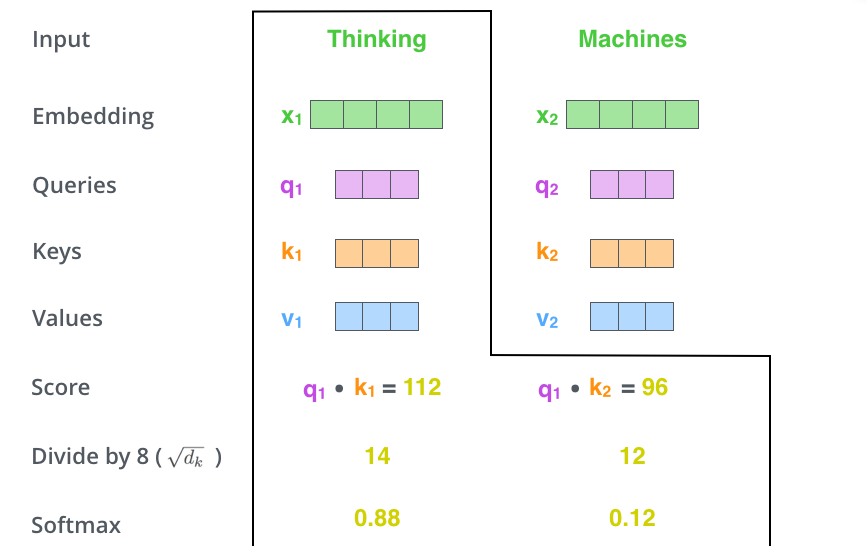
<br> Source: [Illustrated transformer Jay alammar](http://jalammar.github.io/illustrated-transformer/)

In [ ]:
print("Step 4: Scaled Attention Scores")
k_d=1   #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 8. 16. 16.]
 [16. 64. 48.]
 [16. 48. 40.]]


In [ ]:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])
attention_scores


Step 5: Scaled softmax attention_scores for each vector
[1.67703185e-04 4.99916148e-01 4.99916148e-01]
[1.42516392e-21 9.99999887e-01 1.12535162e-07]
[1.26599186e-14 9.99664650e-01 3.35350130e-04]


array([[1.67703185e-04, 4.99916148e-01, 4.99916148e-01],
       [1.42516392e-21, 9.99999887e-01, 1.12535162e-07],
       [1.26599186e-14, 9.99664650e-01, 3.35350130e-04]])

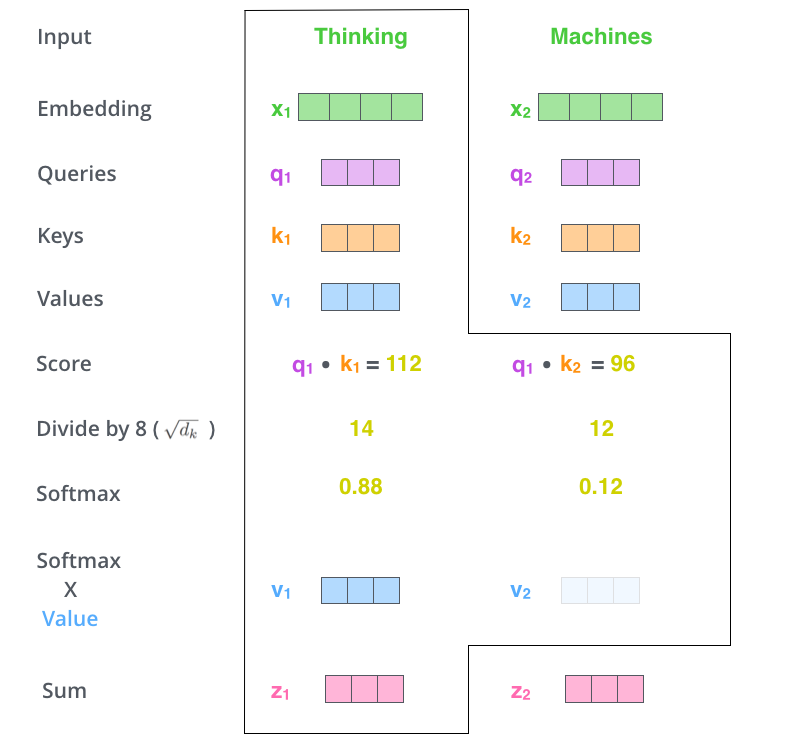
<br> Source: [Illustrated transformer Jay alammar](http://jalammar.github.io/illustrated-transformer/)

In [ ]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[2. 4. 6.]
[ 4. 16.  0.]
[ 4. 12.  6.]
Attention 1
[0.00033541 0.00067081 0.00100622]
Attention 2
[1.99966459 7.99865837 0.        ]
Attention 3
[1.99966459 5.99899378 2.99949689]


In [ ]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[ 3.99966459 13.99832297  3.00050311]


In [ ]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.71725453 0.88336043 0.63376457 0.34835381 0.56722055 0.19837219
  0.26401436 0.62864959 0.22651426 0.23279272 0.34795667 0.80556183
  0.24799469 0.36191321 0.13860598 0.01303042 0.12710435 0.844613
  0.35545248 0.02500736 0.75313796 0.27084585 0.81455592 0.19116308
  0.12681505 0.62014294 0.99948863 0.40446949 0.19408373 0.75493762
  0.66632962 0.38615232 0.43301295 0.77065156 0.90295064 0.63414365
  0.73438234 0.18747904 0.02128085 0.64163385 0.03879492 0.52814821
  0.47047716 0.63390098 0.53321297 0.97853968 0.95676031 0.2272629
  0.5473536  0.60073168 0.619008   0.42075943 0.62435589 0.9474292
  0.3915456  0.01472038 0.62583711 0.04093785 0.19236883 0.42559176
  0.27132868 0.2338663  0.67392738 0.46750705]
 [0.88253332 0.44771239 0.36267488 0.90614416 0.65000359 0.49232253
  0.51400815 0.52335144 0.59092177 0.64414614 0.35036848 0.80118471
  0.6428032  0.39724088 0.62202473 0.10080862 0.2552541  0.9529916
  0.99582962 0.37277724 0.2288963  0

In [ ]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
shape of one head (3, 64) dimension of 8 heads 512


In [ ]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concantenation of heads 1 to 8 to obtain the original 8x64=512 ouput dimension of the model
[[0.46950893 0.88546586 0.47615937 ... 0.08285802 0.16577096 0.61094461]
 [0.31638247 0.24246402 0.30390966 ... 0.42283366 0.62127905 0.64414042]
 [0.1922683  0.7017995  0.60116595 ... 0.20012387 0.16264044 0.93645276]]
